In [1]:
""" 
The Monty Hall problem
https://en.wikipedia.org/wiki/Monty_Hall_problem 
"""
from random import randint
from enum import Enum
import matplotlib.pyplot as plt


In [2]:
class Strategy(Enum):
    CHANGE = 1
    KEEP = 0

In [3]:
def play_game(strategy):
    
    doors = [0, 1, 2]

    good_door = randint(0,2)
    
    premier_choice = randint(0,2)
    doors.remove(premier_choice)

    if premier_choice == good_door:
        doors.remove(doors[randint(0,1)])
    else:
        doors = [good_door]

    second_choice = 0
    
    if strategy == Strategy.KEEP:
        second_choice = premier_choice
    else:
        second_choice == doors[0]

    return second_choice == good_door

In [4]:
def play(strategy, nb_tours):
    return [ 1 if play_game(strategy) else 0 for i in range(nb_tours)]

In [5]:
sum(play(Strategy.CHANGE, 1000))

325

In [6]:
sum(play(Strategy.KEEP, 1000))

345

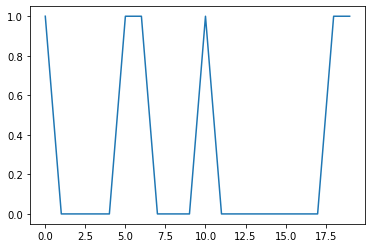

In [7]:
plt.plot(play(Strategy.CHANGE, 20))

<BarContainer object of 2 artists>

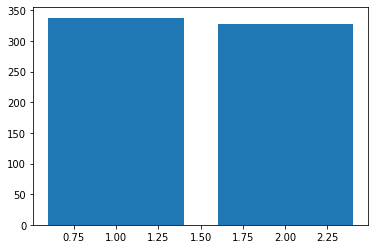

In [8]:
plt.bar([1,2], [sum(play(Strategy.CHANGE, 1000)), sum(play(Strategy.KEEP, 1000))])
